In [1]:
import numpy as np
from scipy.stats import *
import pandas as pd
import math

# Jupyter Notebook의 출력을 소수점 이하 3자리로 제한
%precision 3
# Dataframe의 출력을 소수점 이하 3자리로 제한
pd.set_option('precision', 3)
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"


### 데이터의 특징을 요약, 기술하는 통계량
- 위치 통계량(measure of location) : 대표 통계량
    - 데이터의 중심 위치를 나타내는 척도(대표값)
    - 평균, 중위수, 절사평균, 최빈수 등

- 변이 통계량(measure of dispersion) : 산포 통계량
    - 데이터의 퍼짐,흩어진 정도를 나타내는 척도(산포도)
    - 표준편차, 분산, 사분위간범위 등

- 모양 통계량(measure of shape) : 분포 통계량
    - 사분위수
    
    - 왜도
        - 중심 위치로부터 어느 한쪽으로 치우친(비대칭) 정도를 나타내는 척도
    - 첨도
        - 분포의 뾰족한 정도


## 위치 통계량(중심 경향성)

####  평균(mean)
- 가장 많이 사용되는 대표값
    - 모든 데이터의 합을 데이터의 개수로 나눈 값(산술평균)
   ![](pic/평균.png)

- 특징
    - 계산이 쉽고, 수학적으로 활용하기 편리하며 각 자료에 대해 유일한 값을 가짐
    - 분산의 계산, 모수 추정, 가설검정 등 통계분석의 대표적인 통계량으로 널리 사용됨
    - 데이터에 극단적인 값이 포함될 경우 평균이 왜곡되는 경향이 있음
    - 이러한 경우, 대표 값으로 중앙값을 사용


#### 산술 평균 계산
- 가장 널리 사용되는 평균으로 연속형 변수에 대해 사용
- 다른 관측치에 비해 매우크거나 작은값에 크게 영향을받음


In [2]:
x = [1,2,3,4,5]
np.mean(x)
np.array(x).mean()
pd.Series(x).mean()

3.0

3.0

3.000

In [3]:
# 이진 변수에 대한 평균 - 이진값(0,1로 구성된 값)
# 이진 변수에 대한 산술 평균은 1의 비율과 같음
x = [1,0,0,0,1]
print(np.mean(x))

0.4


In [4]:
df = pd.read_csv('../../data/data/ch2_scores_em.csv',
                 index_col='student number')
# df의 처음 5행을 표시
df.head()
df.info()

,english,mathematics
student number,,
1,42,65
2,69,80
3,56,63
4,41,63
5,57,76


<class 'pandas.core.frame.DataFrame'>
Int64Index: 50 entries, 1 to 50
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   english      50 non-null     int64
 1   mathematics  50 non-null     int64
dtypes: int64(2)
memory usage: 1.2 KB


In [5]:
scores=np.array(df['english'])[:10]
scores_df = pd.DataFrame({'score':scores},
                         index=pd.Index(['A', 'B', 'C', 'D', 'E',
                                         'F', 'G', 'H', 'I', 'J'],
                                        name='student'))
scores_df


,score
student,
A,42
B,69
C,56
D,41
E,57
F,48
G,65
H,49
I,65


In [6]:
sum(scores)/len(scores)
np.mean(scores)
scores_df.mean()


55.0

55.0

score    55.0
dtype: float64

#### 기하평균
- n개의 양수 값을 모두 곱한 것의 n 제곱근
- 성장률의 평균
![](pic/기하평균.png)


- 아래 year데이터는 어느 회사의 매출 증가율을 수집해 놓은 데이터임
    - 1차년도에 200% , 2차년도에 800%, 3차년도에 300% 성장을 했다면 연평균 성장율은 어떻게 되는가?


In [7]:
year = [2,8,3]

In [8]:
# 위 데이터의 산술평균
np.mean(year)

# 매년 430% 성장으로 나타남
# 1차년도에 430, 2차년도 430%, 3차년도 430%
# 전년대비 성장 이므로 430 * 430 * 430 = 79507000 성장한 상황이 됨

# 실제 성장은 200 * 800 * 300 = 48000000 성장한 것이므로 차이가 많다.
# 곱하기를 해서 나오는 값에 대한 평균은 산술평균을 사용하면 의미가 달라지므로
# 기하평균을 사용하게 됨


4.333333333333333

In [9]:
def multiply(arr):
    ans = 1
    for n in arr:
        if n == 0:
                return 0
        ans *= n
    return ans


In [10]:
multiply(year)**(1/len(year))

multiply(year)**(1/len(year)) * multiply(year)**(1/len(year)) * multiply(year)**(1/len(year))

3.634*3.634*3.634


3.634

48.000

47.990

#### 조화평균

- 비율 및 변화율에 대한 평균을 계산할 때 사용
- 주어진 수들의 역수들의 산술평균에서 역수를 취한 값


![](pic/조화평균.png)

#### 100km 떨어진 도시까지 차로 다녀오면서 가는길은 시속 80km 오는길은 시속 120km로 달렸을때 평균 속력은?


- 움직인 거리 : 200km
- 움직인 시간 : 100/80 + 100/120 
![](pic/조화평균예제.png)

In [11]:
x = np.array([80, 120])
print(len(x)/np.sum(1/x))
print(hmean(x)) # 조화평균을 계산해주는 함수 : hmean(data)


95.99999999999999
95.99999999999999


In [12]:
x= np.array([0.1,0.2,0.3,0.4,0.5])
print(len(x)/np.sum(1/x))
print(hmean(x))

0.21897810218978103
0.21897810218978103


### 중앙값(median)

- 중위수, 중간값
- 데이터를 크기 순서대로 나열할 때 가운데 위치 하는 숫자
- 데이터의 개수가 홀수일 경우 : 가운데 위치하는 유일한 숫자
- 데이터의 개수가 짝수일 경우 : 가운데 위치하는 2개 숫자의 평균값
![](pic/중앙값.png)
- 특징
    - 극단적인 값에 영향을 받지 않는 장점
    - 가운데 위치하는 한 개 또는 두 개의 데이터만으로 계산


- 극단적인 값이 포함된 데이터의 대표 값 비교

    - 평균 : 모든 데이터를 전부 고려하여 계산한 값, 무게 중심
    - 중앙값 : 데이터의 개수와 순서만을 고려하여 계산 
    - 예. 세 개의 추(10kg, 20kg, 60kg)가 있는 경우
        - 평균은 세 무게의 균형을 나타내는 시소의 중심
        - 중앙값은 개수(3)의 중앙(2)을 나타냄 
        - 만약 60kg의 추를 80kg으로 대체할 경우 평균을 나타내는 시소의 중심은 오른쪽으로 이동하지만, 중앙값은 변화하지 않고 그대로 20kg이 됨
![](pic/평균과중앙값의비교.PNG)

In [13]:
scores

array([42, 69, 56, 41, 57, 48, 65, 49, 65, 58], dtype=int64)

In [14]:
sorted_scores=np.sort(scores)
sorted_scores

array([41, 42, 48, 49, 56, 57, 58, 65, 65, 69], dtype=int64)

In [15]:
n = len(sorted_scores)

if n % 2 == 0:
    m0 = sorted_scores[n//2 - 1]
    m1 = sorted_scores[n//2]
    median = (m0 + m1)/2
    
else :
    median = sorted_scores[n//2 -1]
    
median

56.5

In [16]:
np.median(scores)
scores_df.median()

56.5

score    56.5
dtype: float64

#### 절사 평균(trimmed mean)이 필요한 이유

- 평균의 장점과 중앙값의 장점을 갖는 대표값 
- 예.
    - 체조, 다이빙, 피겨스케이팅 등에서 심판의 주관적인 편견을 배제, 보완하기 위해 제일 높은 점수와 제일 낮은 점수를 제외(중앙값의 장점)한 나머지 심판들의 점수에 대한 평균(평균의 장점)으로 판정

- 절사평균을 계산하려면 절사비율(%)을 결정해야 함 

    - 절사비율은 전체 데이터의 개수에 대해 몇 %의 데이터(상위+하위)를 배제할 것인가로 결정
    - 만약 5개의 데이터에 대해 가장 낮은 점수와 가장 높은 점수 각각 1개씩을 배제한다면 절사율은 40%(2/5)가 됨
    - 5개의 데이터에 대해 40% 절사평균
    - 데이터를 순서대로 정렬한 경우 가운데 위치하는 3개의 평균으로 계산


In [17]:
income = np.random.normal(2000000, 500000, 100)
# 평균이 200만원이고 표준편차가 50만원인 정규분포를 따르는 급여 100명생성

np.mean(income)

1980685.0288615185

In [18]:
income = np.append(income,10**9) # 급여가 10억원인 사람이 등장
np.mean(income)

# 100명의 소득이 200만원에 가까운데 한명 때문에 대표값인 평균이 1200만원에 달함
# 절사평균이 필요


11862064.385011405

# 절사평균 계산
- 매우 크거나 작은 값에 의한 영향을 줄이기 위해 고안 됨
- 데이터에서 범위에 속하는 데이터에 대해서만 평균을 낸 것
- trim_mean(x, proportiontocnt)
- proportiontocnt : 절단 비율

In [19]:
trim_mean(income, 0.2) # [20% ~ 80%]

1952495.4913785774

### 최빈값(mode)

- 자료 중 가장 자주 나타나는(빈도가 가장 많은) 관측치
   - 평균, 중위수와 달리 자료에 따라 존재하지 않을수도 있고, 유일한 값이 아닐 수도 있음
   - 질적 변수에도 활용
       - 좋음/보통/나쁨 의 최빈 값


- 중앙값과 최빈값의 특징

   -  자료 속에 극단적인 이상치가 있는 경우 극단적 관찰치에 덜 민감한 중앙값을 사용
   -  자료의 분포가 비대칭인 경우 평균의 보조 자료로 활용
   -  개방 구간을 갖는 도수분포표의 경우 중앙값 또는 최빈값을 대표값으로 사용
   -  명목자료와 서열자료의 경우 최빈값 사용


#### 최빈값 계산
- 한 변수가 가장 많이 취한 값을의미,범주형 변수에 대해서만적용


In [20]:
np.random.seed(3)
x = np.random.choice(['A', 'B', 'C'], 1000) # A, B, C라는 요소로 구성
x[:10]
len(x)


array(['C', 'A', 'B', 'A', 'A', 'A', 'B', 'B', 'C', 'B'], dtype='<U1')

1000

In [21]:
## 최빈값 구하는 함수 : mod(x) # [0] : 최빈값, [1] : 빈도
mode(x)
mode(x).mode
mode(x).count

ModeResult(mode=array(['A'], dtype='<U1'), count=array([350]))

array(['A'], dtype='<U1')

array([350])

In [22]:
pd.Series(x).value_counts().index[0]

'A'

### 사분위수(quartile)


- 자료를 크기 순으로 늘어 놓은 수 4등분하여 각각의 경계에 있는 수
    - 제1사분위수(하사분위수, Q1, the first quartile)
        - 자료의 ¼  또는 25%에 해당하는 값
        - 𝑄1=(𝑛+1)1/4=(𝑛+1)25/100 번째순위값 

    - 제2사분위수(중위수, Q2, the second quartile)
        - 자료의 2/4 또는 50%에 해당하는 값

    - 제3사분위수(상사분위수, Q3, the third quartile)
        - 자료의 ¾ 또는 75%에 해당하는 값
        - 𝑄3=(𝑛+1)3/4=(𝑛+1)75/100 번째순위값


### 백분위수(percentile)
- 크기 순으로 나열한 수들을 백등분하여 각각의 경계에 있는 수
    - 제25백분위수
        - 자료의 ¼  또는 25%에 해당하는 값
        - 제1사분위수와 같음(Q1)
        - 𝑄1=(𝑛+1)1/4=(𝑛+1)25/100 번째순위값 

    - 제50백분위수
        - 자료의 2/4 또는 50%에 해당하는 값
        - 제2사분위수(중앙값) 

    - 제75백분위수
        - 자료의 ¾ 또는 75%에 해당하는 값
        - 𝑄3=(𝑛+1)3/4=(𝑛+1)75/100 번째순위값


### 위치 통계량
- 최소값, 제1사분위수, 중위수, 제3사분위수, 최대값
- 상자-수염그림(boxplot)
![](pic/사분위수.png)

In [25]:
## 예제 data 생성

X = np.random.normal(100,20, size=1000)
X[:20]


array([ 89.893,  99.659, 109.431, 106.139,  90.809,  79.134, 115.106,
        55.735, 106.652, 105.434, 110.579,  92.663, 104.454, 115.947,
        79.13 , 101.133, 107.678,  74.82 ,  81.09 , 131.735])

In [26]:
# 최대, 최소 범위값(최대값 - 최소값)
np.max(X) - np.min(X)
np.ptp(X) # 최대/최소 범위 반환


111.55555646278212

111.55555646278212

#### IQR : 사분위 범위(데이터의 하위 75% - 하위 25%)
- IQR = Q3-Q1

Q2 : 중앙값

In [27]:
# np. quantitle(data, 위치): data에서 위치에 해당하는 값을 반환
np.quantile(X,0.75) - np.quantile(X,0.25)
iqr(X) # 사분위 범위를 계산해 주는 함수
# 사분위 범위 : 이상치 영향을 줄이기 위해 25% ~ 75% 데이터를 활용
# IQR 이라고도 함

26.083688335107283

26.083688335107283

{'whiskers': [<matplotlib.lines.Line2D at 0x198bdcfb4c0>,
 'caps': [<matplotlib.lines.Line2D at 0x198bdcfbb80>,
 'boxes': [<matplotlib.lines.Line2D at 0x198bdcfb160>],
 'medians': [<matplotlib.lines.Line2D at 0x198bdd08280>],
 'fliers': [<matplotlib.lines.Line2D at 0x198bdd085e0>],
 'means': []}

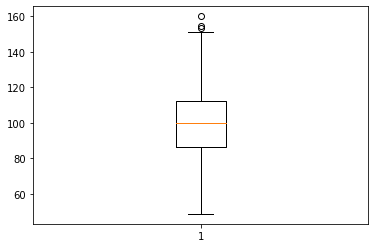

In [28]:
import matplotlib.pyplot as plt

plt.boxplot(X)